In [1]:
#!pip install opencv-python
#!apt-get update ##[edited]
#!apt-get install ffmpeg libsm6 libxext6  -y

In [31]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import s3fs
import numpy as np
import boto3
import cv2

In [32]:
fs = s3fs.S3FileSystem()

# To List 5 files in your accessible bucket
images = fs.ls('s3://sxm-ecomm-sagemaker-dev/images/')
images = (images[1:])
#print(images)
print(images)

['sxm-ecomm-sagemaker-dev/images/21.331533_-157.865814_19_600x600_approx.png', 'sxm-ecomm-sagemaker-dev/images/28.782888_-97.045563_19_600x600_approx.png', 'sxm-ecomm-sagemaker-dev/images/29.449435_-95.078111_19_600x600_approx.png', 'sxm-ecomm-sagemaker-dev/images/29.617713_-95.564214_19_600x600_approx.png', 'sxm-ecomm-sagemaker-dev/images/30.166849_-81.748018_19_600x600_approx.png', 'sxm-ecomm-sagemaker-dev/images/30.742342_-99.225417_19_600x600_approx.png', 'sxm-ecomm-sagemaker-dev/images/31.782211_-97.576846_19_600x600_approx.png', 'sxm-ecomm-sagemaker-dev/images/32.012106_-90.357557_19_600x600_approx.png', 'sxm-ecomm-sagemaker-dev/images/32.156635_-94.345393_19_600x600_approx.png', 'sxm-ecomm-sagemaker-dev/images/32.196769_-95.853902_19_600x600_approx.png', 'sxm-ecomm-sagemaker-dev/images/32.621311_-93.268366_19_600x600_approx.png', 'sxm-ecomm-sagemaker-dev/images/32.755714_-117.126091_19_600x600_approx.png', 'sxm-ecomm-sagemaker-dev/images/32.781604_-97.388521_19_600x600_approx.pn

In [33]:
# Get coords from s3 file
#client = boto3.client('s3')
#path = 's3://sxm-ecommerce-p66-location-data/coords/3000_coords.csv'
#df = pd.read_csv(path)
#df.drop('location_id', axis=1, inplace=True)
#df.drop('merchant_location_id', axis=1, inplace=True)
#df.sort_values(by=['merchant_location_latitude'], inplace=True)
#df.to_csv('sorted_csv.csv', encoding='utf-8', index=False)

In [34]:
#df = pd.read_csv('sorted_csv.csv')
#df = df.drop(df.index[range(105)])
#df.head()

In [35]:
def scale_colors(uniqueColor, maxColor, minColor):    
    for color_idx in argSortedCounts[-numColors:]:
        color = uniqueColor[color_idx]
        R = color[0]
        G = color[1]
        B = color[2]
        maxColor = scale_max_color(maxColor, R, G, B)
        minColor = scale_min_color(minColor, R, G, B)

def scale_max_color(maxColor, R, G, B):
    if R > maxColor[0]:
            maxColor[0] = R
    if G > maxColor[1]:
            maxColor[1] = G
    if B > maxColor[2]:
            maxColor[2] = B
    return maxColor
                
def scale_min_color(minColor, R, G, B):
    if R < minColor[0]:
        minColor[0] = R
    if G < minColor[1]:
        minColor[1] = G
    if B < minColor[2]:
        minColor[2] = B
    return minColor

In [36]:
def boost_contrast(i, minColor, maxcolor):
    iContrast = np.zeros(i.shape)
    iContrast = (i - minColor) * 255 / (maxColor - minColor)        
    return iContrast

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

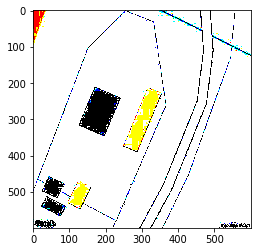

In [39]:
img_num = 0
for image in images:
#     image = 'sxm-ecommerce-p66-location-data/version2/training_images/30.166849_-81.748018_19_600x600_approx.png'

    with fs.open(image) as f:
        i = plt.imread(f, 0)
        plt.imshow(i)
        #print(i.shape)
        flatImage = np.reshape(i, (i.shape[0]*i.shape[1], i.shape[2]))
        
        uniqueColor, counts = np.unique(flatImage, axis=0, return_counts=True)
        #print(counts)
        sortedCounts = np.sort(counts)
        argSortedCounts = np.argsort(counts)
        
        kernelO = np.ones((5, 5), np.uint8)
        
        numColors = 4
        maxColor = np.zeros(3)
        minColor = np.array([255, 255, 255])
        scale_colors(uniqueColor, maxColor, minColor)

        contrast = boost_contrast(i, minColor, maxColor)
        plt.imshow(contrast)
        #plt.show()
        
        num = 0
        for color_idx in argSortedCounts[-numColors:]:
            #print(num)
            num += 1
            color = uniqueColor[color_idx]
            
            colorImage = i == color

            stacked = np.sum(colorImage, axis=2)
            stacked = stacked >= 3
            stacked = np.asarray(stacked, dtype=float)
            opened = cv2.morphologyEx(stacked, cv2.MORPH_OPEN, kernelO)

            #lat_coords = df['merchant_location_latitude'].values[img_num]
            #long_coords = df['merchant_location_longitude'].values[img_num]
#             plt.imshow(opened)
#             print(opened.shape)
#             plt.title('%f, %f_Freq:%i' % (lat_coords, long_coords, num))
#             plt.axis('off')
#             plt.savefig('data/training_freqs/img_%f, %f_freq_%i.png' % (lat_coords, long_coords, num), bbox_inches='tight')
            image = image.replace('sxm-ecomm-sagemaker-dev/images/', '')
            coords_name = image.replace('_19_600x600_approx.png', '')
            plt.imsave('data/output/freqs/img_%s_freq_%i.png' % (coords_name, num), opened)
            #plt.show()
    img_num +=1